# Загрузка данных
Представлен датасет с вакансиями, собранный в 2022 году. Необходимо предсказать верхний порог заработной платы соискателя по имеющемся признакам.
Ниже предоставлены следующие датасеты

    X_train.csv - файл с данными для обучения (без разметки);
    X_test.csv - файл тестовой выборкой;
    y_train.csv - файл с разметкой для обучающей выборке;
    random_result.csv - пример с разметкой для тестовой выборке (именно такой файл необходимо приложить как решение).

В датасете для обучения (X_train и X_test) представлены следующие признаки:

    id. Идентификатор вакансии. С помощью этого ключа можно смержить X и y;
    name. Наименование вакансии;
    has_test. Булевый признак. Указывает на наличие испытательного срока;
    response_letter_required. Булевый признак. Указывает на необходимость наличия рекомендательного письма
    salary_from. Нижний порог заработной платы;
    salary_currency. Краткое наименование валюты, в которой указана вилка ЗП;
    salary_gross. Булевый признак. Указывает на то, была ли рассчитана заработная плата с учётом налога или нет:
    published_at. Дата и время публикации вакансии;
    created_at. Дата и время создания вакансии
    employer_name. Наименование ЮР лица\ИП разместивший вакансию
    description - описание вакансии
    area_id - идентификатор города
    area_name - название города

In [2]:
import pandas as pd

xtrain_raw = pd.read_csv('X_train.csv', index_col=0)
xtest_raw = pd.read_csv('X_test.csv', index_col=0)
ytrain_raw = pd.read_csv('y_train.csv', index_col=0)

xtrain_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27934 entries, 29083 to 15795
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   name                      27934 non-null  object 
 1   has_test                  27934 non-null  bool   
 2   response_letter_required  27934 non-null  bool   
 3   salary_from               23902 non-null  float64
 4   salary_currency           27934 non-null  object 
 5   salary_gross              27786 non-null  object 
 6   published_at              27934 non-null  object 
 7   created_at                27934 non-null  object 
 8   employer_name             27934 non-null  object 
 9   description               27933 non-null  object 
 10  area_id                   27934 non-null  int64  
 11  area_name                 27934 non-null  object 
dtypes: bool(2), float64(1), int64(1), object(8)
memory usage: 2.4+ MB


In [3]:
print(xtrain_raw.shape)
print(xtest_raw.shape)

(27934, 12)
(9312, 12)


In [20]:
pd.options.display.max_rows = 13

xtrain_raw

,name,has_test,response_letter_required,salary_from,salary_currency,salary_gross,published_at,created_at,employer_name,description,area_id,area_name
id,,,,,,,,,,,,
29083,Менеджер по продажам (брокер) элитной городско...,False,False,NaN,RUR,False,2020-06-16 06:45:04+00,2020-06-16 06:45:04+00,Villagio Estate,<strong>Обязанности:</strong> <p>​​​​​- Прием ...,1,Москва
26052,Product marketing manager / Продуктовый маркет...,False,False,120000.0,RUR,False,2020-07-22 10:24:15+00,2020-07-22 10:24:15+00,CityAds Media,<p><strong>CityAds Media</strong> – один из ли...,1,Москва
24055,Программист Python (Middle),False,False,NaN,RUR,False,2020-04-12 08:19:08+00,2020-04-12 08:19:08+00,Лендсбэй,<p>В перспективный международный Fintech старт...,1,Москва
4408,"Продавец-кассир (Москва, Вернадского, 93)",False,False,33500.0,RUR,True,2020-08-24 01:16:52+00,2020-08-24 01:16:52+00,Пятёрочка,<p><strong>Обязанности:</strong></p><ul><li>Об...,1,Москва
16856,Дизайнер-визуализатор,False,True,30000.0,RUR,True,2021-09-18 13:30:15+00,2021-09-18 13:30:15+00,Моллдекор Рус,<p><strong>Компания MALL DECOR</strong> - лиде...,1,Москва
...,...,...,...,...,...,...,...,...,...,...,...,...
16850,Директор департамента по административной и ка...,False,False,120000.0,RUR,False,2021-10-03 10:04:45+00,2021-10-03 10:04:45+00,Балтик Граунд Сервисес РУ,<p><em>Если вы ищете динамичную работу в расту...,1,Москва
6265,"Продавец-кассир (г Москва, ул Смольная, д 67 к 2)",False,False,33500.0,RUR,True,2020-09-07 00:32:00+00,2020-09-07 00:32:00+00,Пятёрочка,<p><strong>Обязанности:</strong></p><ul><li>Об...,1,Москва
11284,Младший аналитик данных,False,False,50000.0,RUR,False,2021-04-20 08:25:44+00,2021-04-20 08:25:44+00,Баскаков Дмитрий Владимирович,<p>Ищем перспективного и талантливого веб анал...,1,Москва


In [21]:
xtrain_raw.describe()

,salary_from,area_id
count,2.390200e+04,27934.000000
mean,6.417946e+04,15.602456
std,5.553079e+04,141.946736
min,1.000000e+00,1.000000
25%,3.350000e+04,1.000000
50%,5.000000e+04,1.000000
75%,8.000000e+04,2.000000
max,3.400000e+06,5709.000000


# Количественные

## Что в принципе можно сделать с данными?
- две даты не нужны, одну можно смело дропать
- город тоже можно дропать, есть id
- area_id перевести в категориальную, москва-не москва
- дескрипшн в конце тоже выкинуть, он слишком уникален
- name one-hot-им на 8 категорий 1000+
- вторую дату меняем на год
- с employer вообще непонятно че делать, давайте выкинем

## не-тупые модификации:
- парсить в дескрипшне удаленка удаленная, сделать параметр
- точно что-то сделать с доларами - будут явно рубли, долары, евро и етс


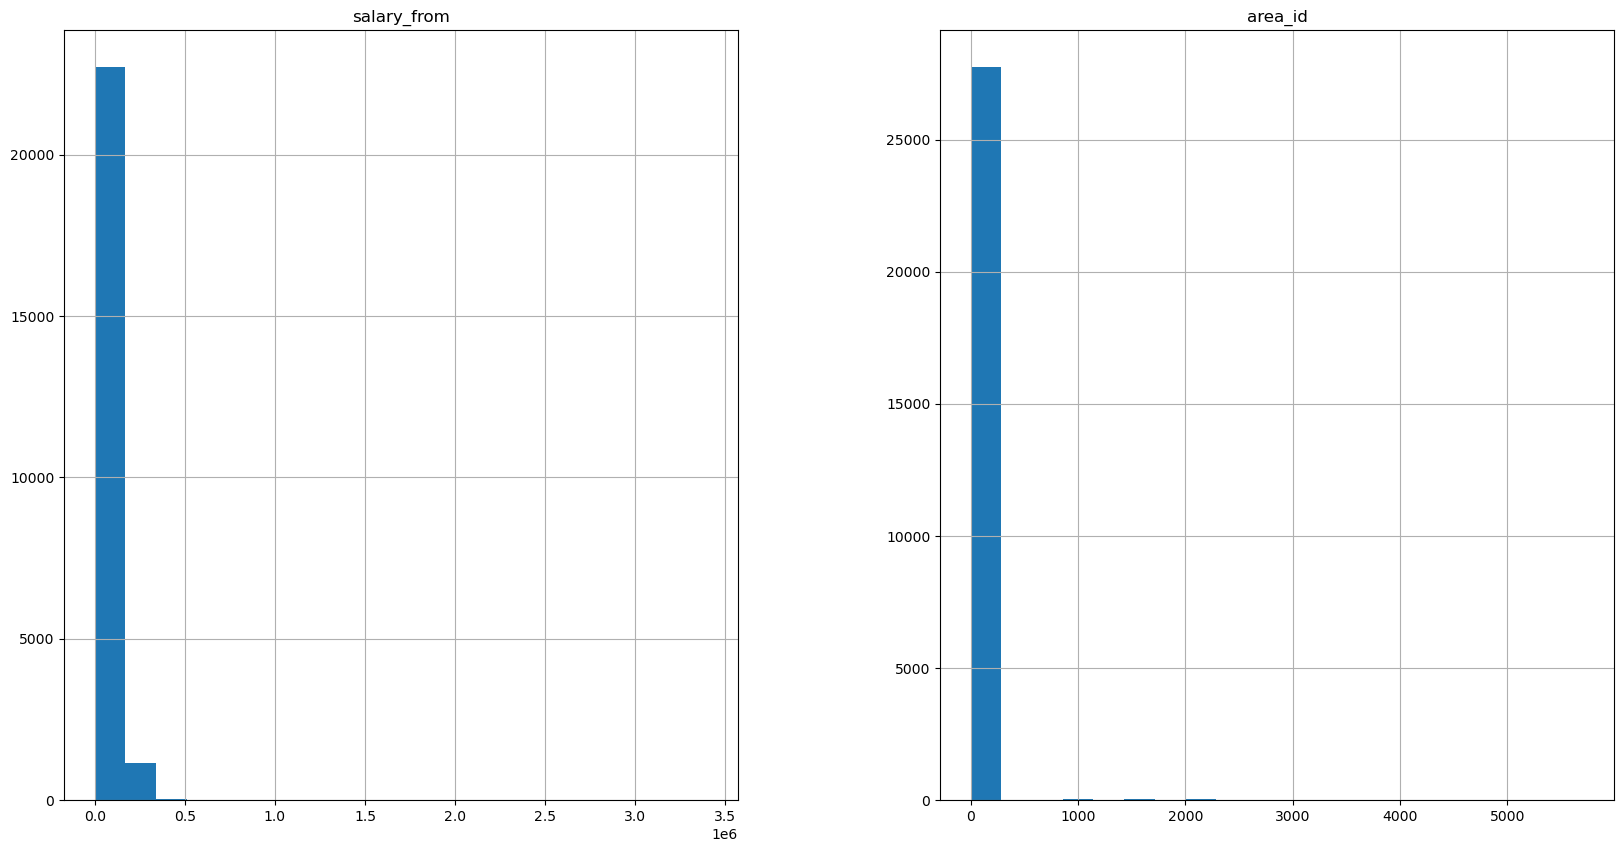

In [13]:
xtrain_raw.hist(figsize=(20, 10),bins = 20);

# Качественные

In [22]:
xtrain_raw.select_dtypes(include='object')

,name,salary_currency,salary_gross,published_at,created_at,employer_name,description,area_name
id,,,,,,,,
29083,Менеджер по продажам (брокер) элитной городско...,RUR,False,2020-06-16 06:45:04+00,2020-06-16 06:45:04+00,Villagio Estate,<strong>Обязанности:</strong> <p>​​​​​- Прием ...,Москва
26052,Product marketing manager / Продуктовый маркет...,RUR,False,2020-07-22 10:24:15+00,2020-07-22 10:24:15+00,CityAds Media,<p><strong>CityAds Media</strong> – один из ли...,Москва
24055,Программист Python (Middle),RUR,False,2020-04-12 08:19:08+00,2020-04-12 08:19:08+00,Лендсбэй,<p>В перспективный международный Fintech старт...,Москва
4408,"Продавец-кассир (Москва, Вернадского, 93)",RUR,True,2020-08-24 01:16:52+00,2020-08-24 01:16:52+00,Пятёрочка,<p><strong>Обязанности:</strong></p><ul><li>Об...,Москва
16856,Дизайнер-визуализатор,RUR,True,2021-09-18 13:30:15+00,2021-09-18 13:30:15+00,Моллдекор Рус,<p><strong>Компания MALL DECOR</strong> - лиде...,Москва
...,...,...,...,...,...,...,...,...
16850,Директор департамента по административной и ка...,RUR,False,2021-10-03 10:04:45+00,2021-10-03 10:04:45+00,Балтик Граунд Сервисес РУ,<p><em>Если вы ищете динамичную работу в расту...,Москва
6265,"Продавец-кассир (г Москва, ул Смольная, д 67 к 2)",RUR,True,2020-09-07 00:32:00+00,2020-09-07 00:32:00+00,Пятёрочка,<p><strong>Обязанности:</strong></p><ul><li>Об...,Москва
11284,Младший аналитик данных,RUR,False,2021-04-20 08:25:44+00,2021-04-20 08:25:44+00,Баскаков Дмитрий Владимирович,<p>Ищем перспективного и талантливого веб анал...,Москва


In [136]:
print("Программист: ", xtrain_raw['name'].str.contains('evelop|рограммист|азработчик', regex=True).sum())
print("Менеджер: ", xtrain_raw['name'].str.contains('anag|енеджер', regex=True).sum())
print("Дизайнер: ", xtrain_raw['name'].str.contains('esign|изайнер', regex=True).sum())
print("Тестировщик: ", xtrain_raw['name'].str.contains('test|естир|qa', regex=True).sum())
print("аналитик: ", xtrain_raw['name'].str.contains('nal|налит', regex=True).sum())
print("админ: ", xtrain_raw['name'].str.contains('дмин', regex=True).sum())
print("руковод: ", xtrain_raw['name'].str.contains('уковод|иректор|прав', regex=True).sum())
print("оператор: ", xtrain_raw['name'].str.contains('пер', regex=True).sum())
print("специалист: ", xtrain_raw['name'].str.contains('пец', regex=True).sum())
print("маркетолог: ", xtrain_raw['name'].str.contains('аркет', regex=True).sum())
print("продавец(кассир, консультант етс): ", xtrain_raw['name'].str.contains('родав', regex=True).sum())
print("инженер: ", xtrain_raw['name'].str.contains('нжене', regex=True).sum())
print("hr: ", xtrain_raw['name'].str.contains('hr|HR|екрут|ecruit', regex=True).sum())
print("уборщик: ", xtrain_raw['name'].str.contains('борщ', regex=True).sum())
print("юрист: ", xtrain_raw['name'].str.contains('юр|Юр', regex=True).sum())
print("бух: ", xtrain_raw['name'].str.contains('ухгал', regex=True).sum())
print("препод: ", xtrain_raw['name'].str.contains('епод|читель', regex=True).sum())
print("повар-пекарь: ", xtrain_raw['name'].str.contains('овар|екарь', regex=True).sum())

Программист:  4632
Менеджер:  5175
Дизайнер:  505
Тестировщик:  131
аналитик:  1176
админ:  965
руковод:  1359
оператор:  1533
специалист:  1488
маркетолог:  645
продавец(кассир, консультант етс):  2119
инженер:  1325
hr:  825
уборщик:  753
юрист:  839
бух:  416
препод:  412
повар-пекарь:  427


In [137]:
pd.options.display.min_rows = 1000
xtrain_raw[~xtrain_raw['name'].str.contains('evelop|end|рограммист|азработчик|anager|енеджер|esign|изайнер|естир|qa|налит|дмин|уковод|иректор|прав|пер|пец|аркет|родав|нжене|hr|HR|екрут|борщ|ecruit|Юр|юр|ухгал|епод|читель|овар|екарь', regex=True)]

,name,has_test,response_letter_required,salary_from,salary_currency,salary_gross,published_at,created_at,employer_name,description,area_id,area_name
id,,,,,,,,,,,,
2441,Провизор/Фармацевт в аптечный пункт льготного ...,False,False,50000.0,RUR,False,2020-08-27 10:49:47+00,2020-08-27 10:49:47+00,ГБУЗ Центр Лекарственного Обеспечения Департам...,<p> </p> <p>ГБУЗ «Центр Лекарственного обеспеч...,1,Москва
30417,Домработница/домработник,False,False,50000.0,RUR,False,2020-06-06 18:05:14+00,2020-06-06 18:05:14+00,Епифанов Михаил Александрович,<p>Домработница с проживанием на лето</p> <p><...,1,Москва
28714,Швея,False,False,60000.0,RUR,False,2020-05-30 06:19:59+00,2020-05-30 06:19:59+00,ТДК Групп,<p><strong>В связи с расширение производства п...,1,Москва
14384,Junior консультант по privacy (удаленно),False,False,NaN,RUR,False,2021-08-29 14:49:15+00,2021-08-29 14:49:15+00,Б152,<p><strong>Команда Б-152</strong> – это одни и...,1,Москва
3609,Координатор отдела продаж,False,False,45000.0,RUR,False,2020-08-28 06:55:47+00,2020-08-28 06:55:47+00,ЛайфМебель,<p><strong>Мебельная компания Лайфмебель - кру...,1,Москва
27894,Визитный мерчендайзер,False,False,30000.0,RUR,False,2020-06-04 10:38:15+00,2020-06-04 10:38:15+00,Работут,<p>Требуются визитные мерчендайзеры для выклад...,1,Москва
674,"Электросварщик (4, 5 разряд)",False,False,44000.0,RUR,True,2020-08-15 06:56:01+00,2020-08-15 06:56:01+00,Московский метрополитен,<p><strong>Обязанности:</strong></p> <ul> <li>...,1,Москва
32915,Аудитор,False,False,NaN,RUR,False,2021-01-11 07:46:37+00,2021-01-11 07:46:37+00,Лого Груп,<p><strong>Обязанности:</strong></p> <p><stron...,1,Москва
28028,ВОДИТЕЛЬ-СЛЕСАРЬ,False,False,80000.0,RUR,False,2020-05-21 10:30:34+00,2020-05-21 10:30:34+00,Замок Сервис,<p><strong>ВОДИТЕЛЬ-СЛЕСАРЬ</strong></p> <p>от...,2,Санкт-Петербург


In [140]:
xtrain_raw[xtrain_raw['name'].str.contains('оор', regex=True)]

,name,has_test,response_letter_required,salary_from,salary_currency,salary_gross,published_at,created_at,employer_name,description,area_id,area_name
id,,,,,,,,,,,,
3609,Координатор отдела продаж,False,False,45000.0,RUR,False,2020-08-28 06:55:47+00,2020-08-28 06:55:47+00,ЛайфМебель,<p><strong>Мебельная компания Лайфмебель - кру...,1,Москва
16516,Координатор отдела,False,False,40000.0,RUR,False,2021-10-18 06:38:53+00,2021-10-18 06:38:53+00,Экостандарт,<p>Компания <strong>EcoStandard group </strong...,1,Москва
23579,Координатор/Ассистент отдела закупок,False,False,60000.0,RUR,False,2020-04-06 06:53:26+00,2020-04-06 06:53:26+00,COZY HOME,<strong>Обязанности:</strong> <ul> <li>Формиро...,1,Москва
8672,"Координатор программы ""Повышение осведомленности""",False,False,50000.0,RUR,False,2021-01-10 11:38:26+00,2021-01-10 11:38:26+00,Благотворительное собрание Все вместе,"<p>Уважаемые соискатели, это вакансия фонда &q...",1,Москва
3509,Координатор BTL-проектов/менеджер по персоналу,False,False,35000.0,RUR,False,2020-09-12 10:25:59+00,2020-09-12 10:25:59+00,"Арт-Эффект, РА",<p>Срочно!!!</p> <p><strong>Обязанности:</stro...,2,Санкт-Петербург
19411,Координатор отдела продаж,False,False,40000.0,RUR,False,2020-03-16 00:51:52+00,2020-03-16 00:51:52+00,ГК ВЛ Лоджистик,<strong>Обязанности:</strong> <ul> <li>Взаимод...,1,Москва
28524,Специалист отдела координации мер господдержки,False,False,40000.0,RUR,False,2020-08-20 10:49:32+00,2020-08-20 10:49:32+00,Министерство сельского хозяйства Российской Фе...,<strong>Обязанности:</strong> <ul> <li>монитор...,1,Москва
31995,Координатор проектов (trade),False,False,NaN,RUR,False,2020-08-13 10:48:58+00,2020-08-13 10:48:58+00,Action,<p><strong>Цели должности:</strong></p> <ul> <...,1,Москва
4293,Координатор продаж,False,False,35000.0,RUR,False,2020-08-29 14:25:53+00,2020-08-29 14:25:53+00,Лотте КФ,<p><strong>Обязанности:</strong></p> <ul> <li>...,1,Москва


In [9]:
# lol
xtrain_raw['salary_currency'].nunique(), xtest_raw['salary_currency'].nunique()

(1, 1)

# research on description features

In [28]:
xtrain_raw['description'].to_csv('descriptions.csv')

In [ ]:
#TODO: extract description length
#TODO: extracr требование вышки
#TODO: компенсация и бесплатное и описании

# Бинарные

In [141]:
xtrain_raw.describe(include='bool')

,has_test,response_letter_required
count,27934,27934
unique,2,2
top,False,False
freq,27227,26847


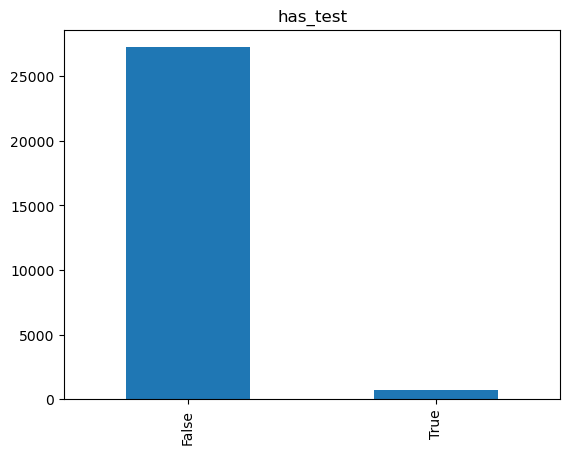

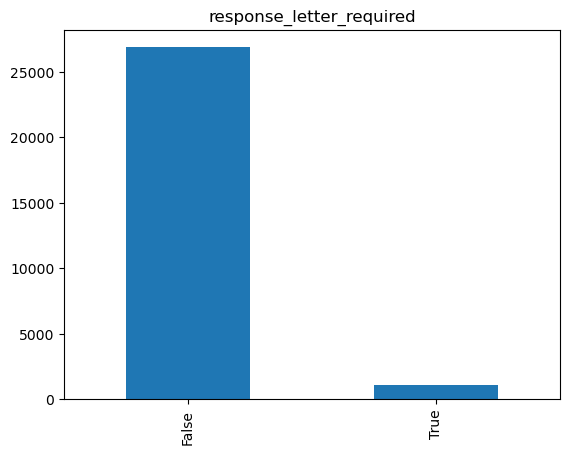

In [145]:
import matplotlib.pyplot as plt
%matplotlib inline

xtrain_raw['has_test'].value_counts(dropna=False).plot.bar(title='has_test')
plt.show()

xtrain_raw['response_letter_required'].value_counts(dropna=False).plot.bar(title='response_letter_required')
plt.show()

In [4]:
xtrain_raw['salary_currency'].isnull().sum()

0

# Обработка данных

In [5]:
import numpy as np
# xtr = xtrain_raw.drop(['Id'], axis=1)
# xtst = xtest_raw.drop(['Id'], axis=1)
xtr = xtrain_raw.copy()
xtst = xtest_raw.copy()


xtr.drop('created_at', axis=1, inplace=True)
xtst.drop('created_at', axis=1, inplace=True)

xtr['published_at'].ffill(inplace=True)
xtr['year'] = pd.to_datetime(xtr['published_at']).dt.year
xtr.drop('published_at', axis=1, inplace=True)
xtst['published_at'].ffill(inplace=True)
xtst['year'] = pd.to_datetime(xtst['published_at']).dt.year
xtst.drop('published_at', axis=1, inplace=True)

xtr.drop('employer_name', axis=1, inplace=True)
xtst.drop('employer_name', axis=1, inplace=True)


xtr['hasremote'] = np.where(xtr['description'].str.contains('удален|Удален', regex=True), True, False)
xtr.drop('description', axis=1, inplace=True)
xtst['hasremote'] = np.where(xtst['description'].str.contains('удален|Удален', regex=True), True, False)
xtst.drop('description', axis=1, inplace=True)

xtr['ismoscow'] = np.where(xtr['area_id'] == 1, True, False)
xtr.drop(['area_id', 'area_name'], axis=1, inplace = True)
xtst['ismoscow'] = np.where(xtst['area_id'] == 1, True, False)
xtst.drop(['area_id', 'area_name'], axis=1, inplace = True)

xtr['salary_from'].fillna(0.0, inplace=True)
xtst['salary_from'].fillna(0.0, inplace=True)

def salcal(row):
    res = row['salary_from']
    if row['salary_currency'] != 'RUR':
        res = res/80.0
    if row['salary_gross'] == True:
        res = res*0.87
    return res

xtr['accurate_salary'] = xtr.apply(salcal, axis=1)
xtr.drop(['salary_currency', 'salary_from', 'salary_gross'], axis=1, inplace=True)
xtst['accurate_salary'] = xtst.apply(salcal, axis=1)
xtst.drop(['salary_currency', 'salary_from', 'salary_gross'], axis=1, inplace=True)

xtr.shape, xtst.shape


((27934, 7), (9312, 7))

In [6]:
xtr['dev'] = np.where(xtr['name'].str.contains('evelop|рограммист|азработчик', regex=True), True, False)
xtr['man'] = np.where(xtr['name'].str.contains('anag|енеджер', regex=True), True, False)
xtr['anal'] = np.where(xtr['name'].str.contains('nal|налит', regex=True), True, False)
xtr['adm'] = np.where(xtr['name'].str.contains('дмин', regex=True), True, False)
xtr['ruk'] = np.where(xtr['name'].str.contains('уковод|иректор|прав', regex=True), True, False)
xtr['oper'] = np.where(xtr['name'].str.contains('пер', regex=True), True, False)
xtr['prod'] = np.where(xtr['name'].str.contains('родав', regex=True), True, False)
xtr['engi'] = np.where(xtr['name'].str.contains('нжене', regex=True), True, False)
xtr['hr'] = np.where(xtr['name'].str.contains('hr|HR|екрут|ecruit', regex=True), True, False)
xtr['cln'] = np.where(xtr['name'].str.contains('борщ|линин', regex=True), True, False)
xtr['law'] = np.where(xtr['name'].str.contains('юр|Юр', regex=True), True, False)
xtr['prep'] = np.where(xtr['name'].str.contains('епод|читель', regex=True), True, False)
xtr['pov'] = np.where(xtr['name'].str.contains('овар|екарь', regex=True), True, False)
xtr['buh'] = np.where(xtr['name'].str.contains('ухгал', regex=True), True, False)



xtr.drop('name', axis=1, inplace=True)

xtst['dev'] = np.where(xtst['name'].str.contains('evelop|рограммист|азработчик', regex=True), True, False)
xtst['man'] = np.where(xtst['name'].str.contains('anag|енеджер', regex=True), True, False)
xtst['anal'] = np.where(xtst['name'].str.contains('nal|налит', regex=True), True, False)
xtst['adm'] = np.where(xtst['name'].str.contains('дмин', regex=True), True, False)
xtst['ruk'] = np.where(xtst['name'].str.contains('уковод|иректор|прав', regex=True), True, False)
xtst['oper'] = np.where(xtst['name'].str.contains('пер', regex=True), True, False)
xtst['prod'] = np.where(xtst['name'].str.contains('родав', regex=True), True, False)
xtst['engi'] = np.where(xtst['name'].str.contains('нжене', regex=True), True, False)
xtst['hr'] = np.where(xtst['name'].str.contains('hr|HR|екрут|ecruit', regex=True), True, False)
xtst['cln'] = np.where(xtst['name'].str.contains('борщ|линин', regex=True), True, False)
xtst['law'] = np.where(xtst['name'].str.contains('юр|Юр', regex=True), True, False)
xtst['prep'] = np.where(xtst['name'].str.contains('епод|читель', regex=True), True, False)
xtst['pov'] = np.where(xtst['name'].str.contains('овар|екарь', regex=True), True, False)
xtst['buh'] = np.where(xtst['name'].str.contains('ухгал', regex=True), True, False)

xtst.drop('name', axis=1, inplace=True)

xtr.head()

,has_test,response_letter_required,year,hasremote,ismoscow,accurate_salary,dev,man,anal,adm,ruk,oper,prod,engi,hr,cln,law,prep,pov,buh
id,,,,,,,,,,,,,,,,,,,,
29083,False,False,2020,False,True,0.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
26052,False,False,2020,True,True,120000.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False
24055,False,False,2020,False,True,0.0,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4408,False,False,2020,False,True,29145.0,False,False,False,False,False,False,True,False,False,False,False,False,False,False
16856,False,True,2021,True,True,26100.0,False,False,False,False,False,False,False,False,False,False,False,False,False,False


# Модель

In [7]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso


In [8]:
GradientBoostingRegr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,
                                   max_depth=4, max_features='sqrt',
                                   min_samples_leaf=15, min_samples_split=10, 
                                   loss='absolute_error', random_state =42)

GradientBoostingRegr.fit(xtr, ytrain_raw.values.ravel())

GradientBoostingRegressor(learning_rate=0.05, loss='absolute_error',
                          max_depth=4, max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=42)

In [9]:
Predictions = GradientBoostingRegr.predict(xtst)

In [10]:
Predictions[:10]

array([ 44045.53687135,  32218.59818043, 293166.05879385, 214757.71057199,
       132568.19273463,  57183.28594435,  35292.63913601,  64019.95034103,
        45000.        ,  33867.1316768 ])

In [11]:
xid = pd.read_csv('X_test.csv',usecols=['id', 'salary_gross'])

xid.head()

,id,salary_gross
0,20978,False
1,3102,False
2,14731,False
3,16113,False
4,8410,False


In [12]:
def to_gross(row):
    res = row['salary']
    if row['salary_gross'] == True:
        res = res*1.13
    return res;

In [14]:
xid['salary'] = Predictions
xid['salary_to'] = xid.apply(to_gross, axis=1)

xid.head()

,id,salary_gross,salary,salary_to
0,20978,False,44045.536871,44045.536871
1,3102,False,32218.598180,32218.598180
2,14731,False,293166.058794,293166.058794
3,16113,False,214757.710572,214757.710572
4,8410,False,132568.192735,132568.192735


In [15]:
xid.head(20)

,id,salary_gross,salary,salary_to
0,20978,False,44045.536871,44045.536871
1,3102,False,32218.598180,32218.598180
2,14731,False,293166.058794,293166.058794
3,16113,False,214757.710572,214757.710572
4,8410,False,132568.192735,132568.192735
5,35395,False,57183.285944,57183.285944
6,21864,False,35292.639136,35292.639136
7,36701,True,64019.950341,72342.543885
8,21773,True,45000.000000,50850.000000
9,31078,False,33867.131677,33867.131677


In [16]:
xid.drop(['salary', 'salary_gross'], axis=1, inplace=True)
xid.head()

,id,salary_to
0,20978,44045.536871
1,3102,32218.598180
2,14731,293166.058794
3,16113,214757.710572
4,8410,132568.192735


In [17]:
xid.to_csv('submission.csv', index=False)